In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Users\\franc\\Downloads\\owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401107,ZWE,Africa,Zimbabwe,2024-05-08,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
401108,ZWE,Africa,Zimbabwe,2024-05-09,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
401109,ZWE,Africa,Zimbabwe,2024-05-10,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
401110,ZWE,Africa,Zimbabwe,2024-05-11,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


### Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [4]:
#panoramica del numero di righe e colonne
df.shape

(401112, 67)

In [5]:
#panoramica dei metadati
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401112 entries, 0 to 401111
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    401112 non-null  object 
 1   continent                                   381883 non-null  object 
 2   location                                    401112 non-null  object 
 3   date                                        401112 non-null  object 
 4   total_cases                                 362004 non-null  float64
 5   new_cases                                   389832 non-null  float64
 6   new_cases_smoothed                          388602 non-null  float64
 7   total_deaths                                339451 non-null  float64
 8   new_deaths                                  390196 non-null  float64
 9   new_deaths_smoothed                         388966 non-null  float64
 

* Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [6]:
# La funzione sum è applicata su new cases perchè total cases è cumulativo
continent_except_nan = df.groupby('continent', dropna=True)['new_cases'].sum()
continent_except_nan

continent
Africa            13143942.0
Asia             301487163.0
Europe           252574063.0
North America    124568488.0
Oceania           14940134.0
South America     68834959.0
Name: new_cases, dtype: float64

* Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

##### pseudocode per il codice richiesto
* avere due variabili dinamiche per nome continente
* calcolare massimo , media, perentuale sul totale
* fare il confronto delle due variabili selezionate

In [7]:
#creazione di tre variabili da usare in una funzione (codice chiesto dalla traccia)
# la sottostante variabile rappresenta il numero massimo
max_totalcases = df.groupby('continent')['new_cases'].sum()
max_totalcases


continent
Africa            13143942.0
Asia             301487163.0
Europe           252574063.0
North America    124568488.0
Oceania           14940134.0
South America     68834959.0
Name: new_cases, dtype: float64

In [8]:
#creazione variabile media usando la variabile new case perchè in questo modo si normalizza la media
mean_continent = df.groupby('continent', dropna=True)['new_cases_per_million'].mean()
mean_continent


continent
Africa            29.489028
Asia              92.134580
Europe           255.964990
North America    146.583250
Oceania          151.763853
South America    115.530179
Name: new_cases_per_million, dtype: float64

In [9]:
#Assegnazione di variabili che include i NaN per trovare la percentuale richiesta dalla traccia
TotalCase_continent = df.groupby('continent', dropna=False)['new_cases'].sum()
TotalCase_includeNan = TotalCase_continent.sum()


#Assegnazione variabile percentuale rispetto casi tot nel mondo
percentage_totalcase = (TotalCase_continent / TotalCase_includeNan) * 100
percentage_totalcase

continent
Africa            0.399923
Asia              9.173179
Europe            7.684928
North America     3.790175
Oceania           0.454575
South America     2.094402
NaN              76.402818
Name: new_cases, dtype: float64

In [10]:
#funzione che mette a confronto i vari patametri di due continenti usati come variabili, usando le tre variabili create
def confronto(x,y):
    print(f'i casi totali di {x} sono :', max_totalcases[x])
    print(f'i casi totali di {y} sono :', max_totalcases[y])
    print()
    print(f'la media dei casi totali di {x} è:', mean_continent[x])
    print(f'la media dei casi totali di {y} è:', mean_continent[y])
    print()
    print(f'la percentuale dei casi totali di {x} è:', percentage_totalcase[x])
    print(f'la percentuale dei casi totali di {y} è:', percentage_totalcase[y])
    return 



In [11]:
##funzione applicata con due variabili esempio
confronto('Asia', 'Europe')

i casi totali di Asia sono : 301487163.0
i casi totali di Europe sono : 252574063.0

la media dei casi totali di Asia è: 92.13458012498829
la media dei casi totali di Europe è: 255.96498983258067

la percentuale dei casi totali di Asia è: 9.17317911615188
la percentuale dei casi totali di Europe è: 7.68492793171837


* Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

#### commento
* le curve hanno andamenti simili, probaile perchè i total cases sono di default una somma cumulativa 

<Axes: xlabel='date', ylabel='total_cases'>

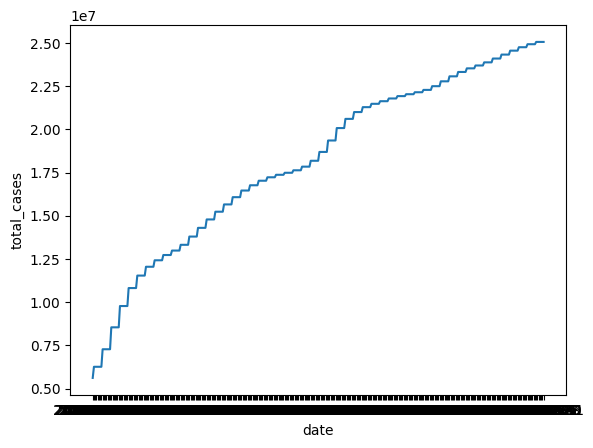

In [12]:
date2022_italy = df.loc[(df['location']== 'Italy') & (df['date'].str.contains('2022')) ]

import seaborn as sns
sns.lineplot(date2022_italy, x='date', y='total_cases')

<Axes: >

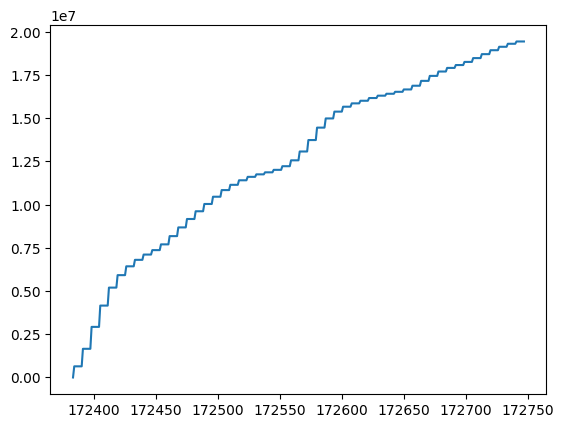

In [13]:
#somma cumulativa dei nuovi casi nel tempo
date2022_italy['new_cases'].cumsum().plot()

* Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

In [14]:
#conversione della colonna data in datatype
df['date'] = pd.to_datetime(df['date'])


In [15]:
#creazione dataframe filtrato per locazione
It_Ger_Fr = df.loc[(df['location'].str.contains('Italy') | df['location'].str.contains('Germany') | df['location'].str.contains('France'))]  
     

In [16]:
#creazione dataframe filtrato per data
It_Ger_Fr_Rangetime =It_Ger_Fr.loc[( df['date'] >= '2022-5-1') & (df['date'] <= '2023-4-30')]
It_Ger_Fr_Rangetime

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121598,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,89526.72,6.19,6.24,1385.2916
121599,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
121600,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
121601,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
121602,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172863,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
172864,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
172865,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
172866,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN


<Axes: xlabel='location', ylabel='icu_patients_per_million'>

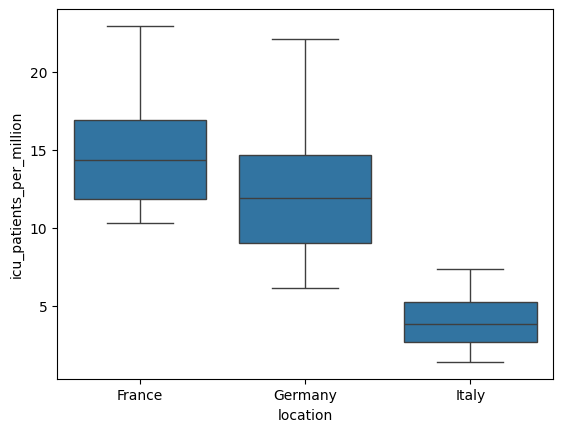

In [17]:
#boxplot usando la variabile icu patients per million per normalizzare la distribuzione nel boxplot
import seaborn as sns
sns.boxplot(It_Ger_Fr_Rangetime, x='location' , y='icu_patients_per_million')

* commento bloxplot: la mediana della francia è più alta, indice di un minor numero di dimessi nell'anno 2022 al contrario dell'Italia

 * Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [36]:
# filtro per locaation
df_filter_location  =df.loc[(df['location'].str.contains('Italy') | df['location'].str.contains('Germany') | df['location'].str.contains('France') | 
                             df['location'].str.contains('Spain'))]
#filtro per data temporale
df_filter_2023 = df_filter_location.loc[(df['date'] >= '2023-1-1') & (df['date'] <= '2023-12-31')]
df_filter_2023

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121843,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,122204.83,6.64,25.88,1887.1414
121844,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
121845,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
121846,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
121847,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339560,ESP,Europe,Spain,2023-12-27,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
339561,ESP,Europe,Spain,2023-12-28,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
339562,ESP,Europe,Spain,2023-12-29,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
339563,ESP,Europe,Spain,2023-12-30,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN


In [19]:
#verifica del numero di nulli
df_filter_2023['hosp_patients'].isna().sum()

843

* ci sono 843 su 1460 righe quindi non si possono eliminare, usare ffill avrebbe un pò di senso essendo che sono dati di update giornalieri ma mi dava problemi con il groupby mentre
la funzione interpolate mi usciva dei risultati troppo sfasati quindi ho optato per non toccare i nulli

In [42]:
#il dato host_patients è un aggiornamento giornaliero di casi (nuovi e dimessi) quindi per avere la somma totale bisogna richiamare il valore massimo
df_filter_2023.groupby('location')['hosp_patients'].max()

location
France     24157.0
Germany        NaN
Italy       8409.0
Spain       3585.0
Name: hosp_patients, dtype: float64